## PCA Kernal         
non-linear     Unsupervised

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [2]:
ds=pd.read_csv('Social_Network_Ads.csv')

In [5]:
ds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
x=ds.iloc[:,[2,3]].values
y=ds.iloc[:,4].values

In [9]:
x,y

(array([[    19,  19000],
        [    35,  20000],
        [    26,  43000],
        [    27,  57000],
        [    19,  76000],
        [    27,  58000],
        [    27,  84000],
        [    32, 150000],
        [    25,  33000],
        [    35,  65000],
        [    26,  80000],
        [    26,  52000],
        [    20,  86000],
        [    32,  18000],
        [    18,  82000],
        [    29,  80000],
        [    47,  25000],
        [    45,  26000],
        [    46,  28000],
        [    48,  29000],
        [    45,  22000],
        [    47,  49000],
        [    48,  41000],
        [    45,  22000],
        [    46,  23000],
        [    47,  20000],
        [    49,  28000],
        [    47,  30000],
        [    29,  43000],
        [    31,  18000],
        [    31,  74000],
        [    27, 137000],
        [    21,  16000],
        [    28,  44000],
        [    27,  90000],
        [    35,  27000],
        [    33,  28000],
        [    30,  49000],
        [   

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [11]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

C:\Users\Shoban_Ash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
kpca=KernelPCA(n_components=2,kernel='rbf')
x_train=kpca.fit_transform(x_train)
x_test=kpca.transform(x_test)

In [13]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
y_pred=log_reg.predict(x_test)

In [15]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 6, 26]], dtype=int64)

In [16]:
acc=(cm[0][0]+cm[1][1])/cm.sum()
acc

0.9

In [17]:
log_reg.score(x_train,y_train)

0.89

In [18]:
log_reg.score(x_test,y_test)

0.9

In [21]:
a=np.arange(0,5)
b=np.arange(0,5)

In [22]:
a,b

(array([0, 1, 2, 3, 4]), array([0, 1, 2, 3, 4]))

In [23]:
aa,bb=np.meshgrid(a,b)

In [24]:
aa,bb

(array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]), array([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]]))

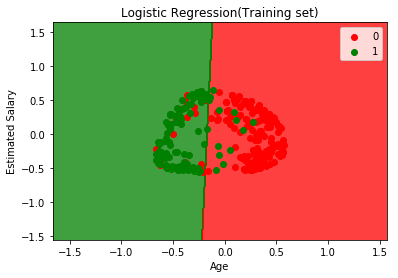

In [26]:
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(x_set[:,0].min()-1,x_set[:,0].max()+1,step=.01),
                  np.arange(x_set[:,1].min()-1,x_set[:,1].max()+1,step=.01))
plt.contourf(x1,x2,log_reg.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha=.75,cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('Logistic Regression(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()